<font color="blue" size ="6"><b>WELCOME TO MACHINE LEARNING AUTOMATION WORKSHOP</b></font>

<font color="yellow" size="4"><b>5 Pycaret Regression </b></font>

In [2]:
import numpy as np
import pandas as pd
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data




In [3]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)



,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [5]:
# compare baseline models
best = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.0930
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1640
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,0.7910
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.1020
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1460
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0490
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.0720
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.8290
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0450
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0450


In [6]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2711.9494,22985713.7501,4794.3418,0.8627,0.4871,0.3389
1,3003.3978,31155820.7166,5581.7399,0.8188,0.4392,0.2816
2,2817.7517,24028712.0822,4901.9090,0.6958,0.5431,0.4229
3,3028.1183,22863856.8784,4781.6166,0.8091,0.5230,0.4498
4,3221.4328,32713532.4851,5719.5745,0.7567,0.5508,0.3445
5,2840.7231,21518462.7443,4638.7997,0.8616,0.3847,0.2746
6,2576.7410,20071287.7437,4480.0991,0.8634,0.3637,0.2903
7,2837.7787,26688236.8750,5166.0659,0.8532,0.4436,0.2610
8,2726.6831,23373383.0335,4834.6027,0.8490,0.4714,0.3861


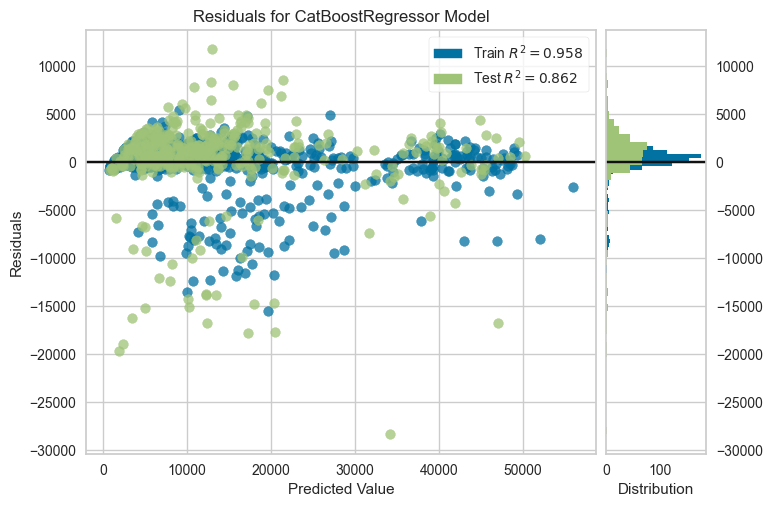

In [7]:
# plot residuals
plot_model(best, plot = 'residuals')

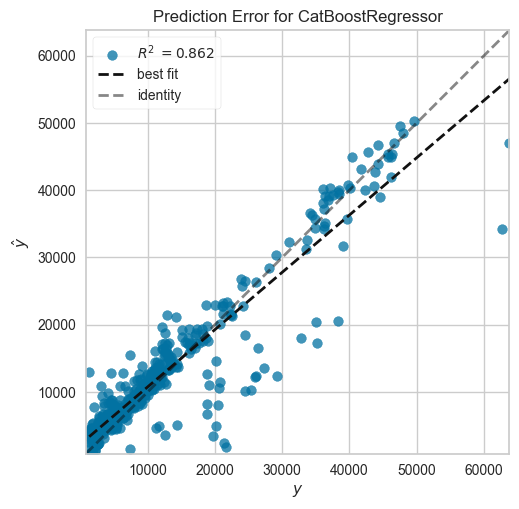

In [8]:
# plot error
plot_model(best, plot = 'error')



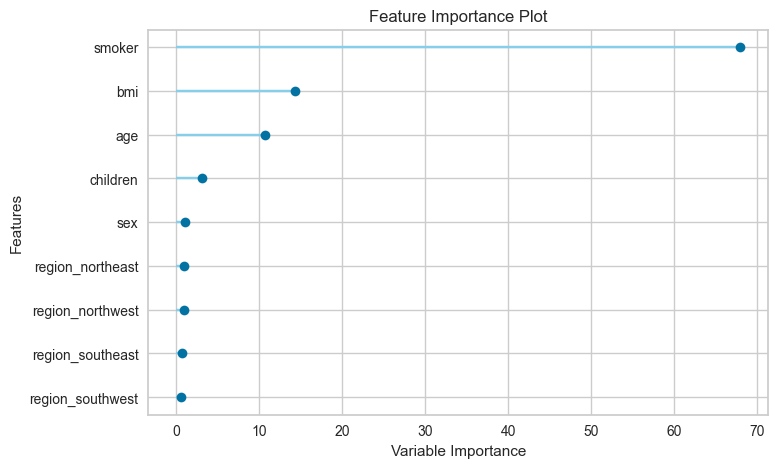

In [9]:
# plot feature importance
plot_model(best, plot = 'feature')



In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# predict on test set
holdout_pred = predict_model(best)



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2578.8127,19697759.5002,4438.2158,0.8621,0.4471,0.3339


In [12]:
# show predictions df
holdout_pred.head()



,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,11253.046845
319,32,male,37.334999,1,no,northeast,4667.607422,8206.080888
314,27,female,31.400000,0,yes,southwest,34838.871094,35771.425530
150,35,male,24.129999,1,no,northwest,5125.215820,5684.215504
336,60,male,25.740000,0,no,southeast,12142.578125,17075.773889


In [13]:
# save pipeline
save_model(best, 'my_first_pipeline_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [14]:


# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline_reg')
loaded_best_pipeline



Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\root\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWr...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x00000241C8935120>)])

In [16]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.0800
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1740
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1440
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,0.7470
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.0920
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.0660
dt,Decision Tree Regressor,3383.4916,47823199.0729,6895.7016,0.6497,0.5602,0.4013,0.0430
huber,Huber Regressor,3462.8269,48860493.9887,6968.1939,0.6540,0.4909,0.2210,0.0560
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0460
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.6550


In [17]:
# list of top 3 models by MAE
best_mae_models_top3



[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [19]:
help(compare_models)

Help on function compare_models in module pycaret.regression.functional:

compare_models(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'R2', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[Dict[str, str]] = None, verbose: bool = True, parallel: Optional[pycaret.internal.parallel.parallel_backend.ParallelBackend] = None)
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross validated scores. Metrics evaluated during CV can be accessed
    using the ``get_metrics`` function. Custom metrics can be added or removed 

In [20]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [21]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


In [22]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,3.377576e+07,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,4.362003e+07,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,3.198111e+07,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,2.651335e+07,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,4.382844e+07,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,3.588234e+07,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,3.963132e+07,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,4.573928e+07,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,4.068192e+07,6378.2377,0.7372,0.7032,0.5225


In [23]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4170.7537,35338831.9346,5944.6473,0.7482,0.6562,0.4578
1,4232.6263,39111399.8519,6253.9108,0.7222,0.5378,0.4306
2,4517.3434,40759725.4885,6384.3344,0.7493,0.6396,0.4387
Mean,4306.9078,38403319.0916,6194.2975,0.7399,0.6112,0.4424
Std,150.9291,2269002.0571,184.3845,0.0125,0.0524,0.0114


In [24]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


LinearRegression(fit_intercept=False, n_jobs=-1)

In [25]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LinearRegression(n_jobs=-1)

In [26]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3244.6173,45002914.9978,6708.4212,0.7312,0.5884,0.4883
1,3121.3069,45456737.6696,6742.1612,0.7357,0.5398,0.3300
2,3646.2662,54445682.2627,7378.7318,0.3107,0.6475,0.4752
3,3228.2250,44536493.7924,6673.5668,0.6281,0.5698,0.4253
4,4344.7470,65261429.3013,8078.4546,0.5146,0.7261,0.6008
5,3497.9281,42984919.0254,6556.2885,0.7235,0.4614,0.3208
6,3464.9372,51736922.8950,7192.8383,0.6480,0.5064,0.3792
7,2804.7111,37461846.7208,6120.6084,0.7940,0.4737,0.1787
8,3080.1801,42102090.8846,6488.6124,0.7281,0.5168,0.4537


In [27]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1643.3779,20046377.2842,4477.3181,0.8636,0.3309,0.1144
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}
# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2862.1689,20651854.5440,4544.4312,0.8767,0.4291,0.3378
1,2985.5485,29278808.6736,5410.9896,0.8298,0.4471,0.3012
2,2843.3673,23854320.1238,4884.0885,0.6980,0.4900,0.3620
3,2868.1258,20204282.7199,4494.9174,0.8313,0.4597,0.4100
4,3153.2150,26237222.1432,5122.2282,0.8049,0.4801,0.3419
5,2735.1828,17885888.8292,4229.1712,0.8849,0.3806,0.2917
6,2606.7286,20086199.5553,4481.7630,0.8633,0.4124,0.3367
7,2831.0258,24114233.9138,4910.6246,0.8674,0.4664,0.3333
8,2663.4574,19629791.0490,4430.5520,0.8732,0.4288,0.3656


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [29]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1643.3779,20046377.2842,4477.3181,0.8636,0.3309,0.1144
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [30]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0.002, min_samples_leaf=5,
                      min_samples_split=5, random_state=123)

In [31]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['age',
                                                                          'bmi',
                                                                          'children'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['sex',
                                                                          'smoker',
                                                                          'region'],
                                                                 transformer=SimpleImputer(strategy='most_fr...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

In [32]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2184.6854,24090332.1975,4908.1903,0.8561,0.4396,0.2327
1,2279.6226,30726168.5883,5543.1190,0.8213,0.4114,0.1251
2,1942.4748,22959394.9812,4791.5963,0.7093,0.5109,0.1520
3,2515.0757,30174312.3406,5493.1150,0.7480,0.4441,0.2456
4,2758.8416,34429106.5336,5867.6321,0.7439,0.5154,0.2024
5,1978.0055,19760889.3268,4445.3222,0.8729,0.3231,0.1209
6,1520.9212,15128338.7957,3889.5165,0.8971,0.2224,0.1023
7,2119.0606,26133152.9795,5112.0596,0.8563,0.4626,0.1386
8,1994.2939,23235196.9895,4820.2901,0.8499,0.3695,0.1299


In [33]:
# help(tune_model)

In [34]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2600.6286,23287999.1449,4825.7641,0.8609,0.4636,0.2991
1,2862.9868,30185856.3778,5494.1657,0.8245,0.4884,0.3060
2,2761.1526,25077468.6110,5007.7409,0.6825,0.5192,0.3371
3,2959.6835,27814653.3277,5273.9599,0.7677,0.5196,0.4226
4,3071.6925,30916545.2241,5560.2649,0.7701,0.5671,0.3901
5,2853.7139,24983085.0973,4998.3082,0.8393,0.3669,0.2570
6,2500.5954,22313062.9978,4723.6705,0.8482,0.3611,0.2562
7,2608.9227,25672109.5843,5066.7652,0.8588,0.4672,0.2438
8,2371.3768,20017410.8875,4474.0821,0.8707,0.4132,0.3070


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [35]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1746.6531,20643719.4928,4543.5360,0.8767,0.4074,0.1675
1,2241.8726,32362162.4596,5688.7751,0.8118,0.4118,0.1286
2,2392.6530,32847809.4992,5731.3009,0.5841,0.5593,0.2931
3,1945.1432,21809063.2050,4670.0175,0.8179,0.3644,0.1662
4,2798.9886,37099381.8334,6090.9262,0.7241,0.5916,0.3102
5,3206.2470,42138546.9895,6491.4210,0.7289,0.4406,0.2501
6,1975.4315,26028317.7743,5101.7955,0.8229,0.3365,0.1408
7,1990.4079,24096760.1889,4908.8451,0.8675,0.4472,0.1479
8,2094.1024,25474853.1172,5047.2619,0.8355,0.4142,0.2000


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [36]:
# help(ensemble_model)

In [37]:
# top 3 models based on mae
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [38]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2716.1584,22038019.7688,4694.4669,0.8684,0.4632,0.3416
1,2863.9275,30816881.5745,5551.2955,0.8208,0.4536,0.2801
2,2583.7407,22271648.0168,4719.2847,0.7180,0.5468,0.3800
3,2812.0516,21738694.2365,4662.4773,0.8185,0.4872,0.3883
4,3071.3180,30742930.6280,5544.6308,0.7713,0.5471,0.3686
5,2853.8334,22049826.6230,4695.7243,0.8582,0.3767,0.2771
6,2441.9787,20171787.8132,4491.3013,0.8627,0.3724,0.2881
7,2589.8732,23542732.1886,4852.0853,0.8705,0.3993,0.2326
8,2264.4241,18060515.7231,4249.7665,0.8833,0.3848,0.2940


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [39]:
# help(blend_models)

In [40]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2644.5958,20512788.0389,4529.1046,0.8775,0.4524,0.3410
1,3016.9488,31628353.9194,5623.9091,0.8161,0.4540,0.2977
2,2542.9489,22039513.9357,4694.6261,0.7210,0.4998,0.3281
3,2940.2543,22174466.8068,4708.9773,0.8148,0.4847,0.3934
4,2923.7892,28231783.2146,5313.3589,0.7900,0.5233,0.3488
5,2675.8664,20115758.5763,4485.0595,0.8706,0.3482,0.2522
6,2344.7437,19806552.1170,4450.4553,0.8652,0.3483,0.2607
7,2591.0959,24537846.0966,4953.5690,0.8651,0.4309,0.2659
8,2227.9359,18040898.9720,4247.4579,0.8835,0.3892,0.2948


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [41]:
# help(stack_models)

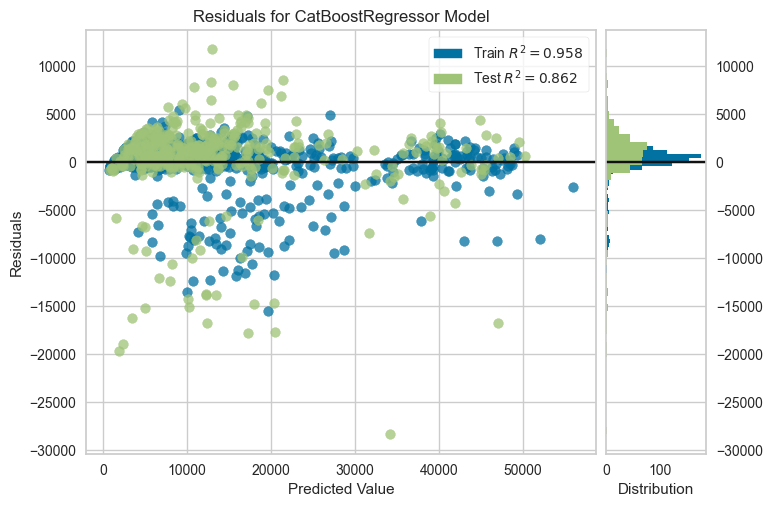

In [42]:
# plot residuals
plot_model(best, plot = 'residuals')

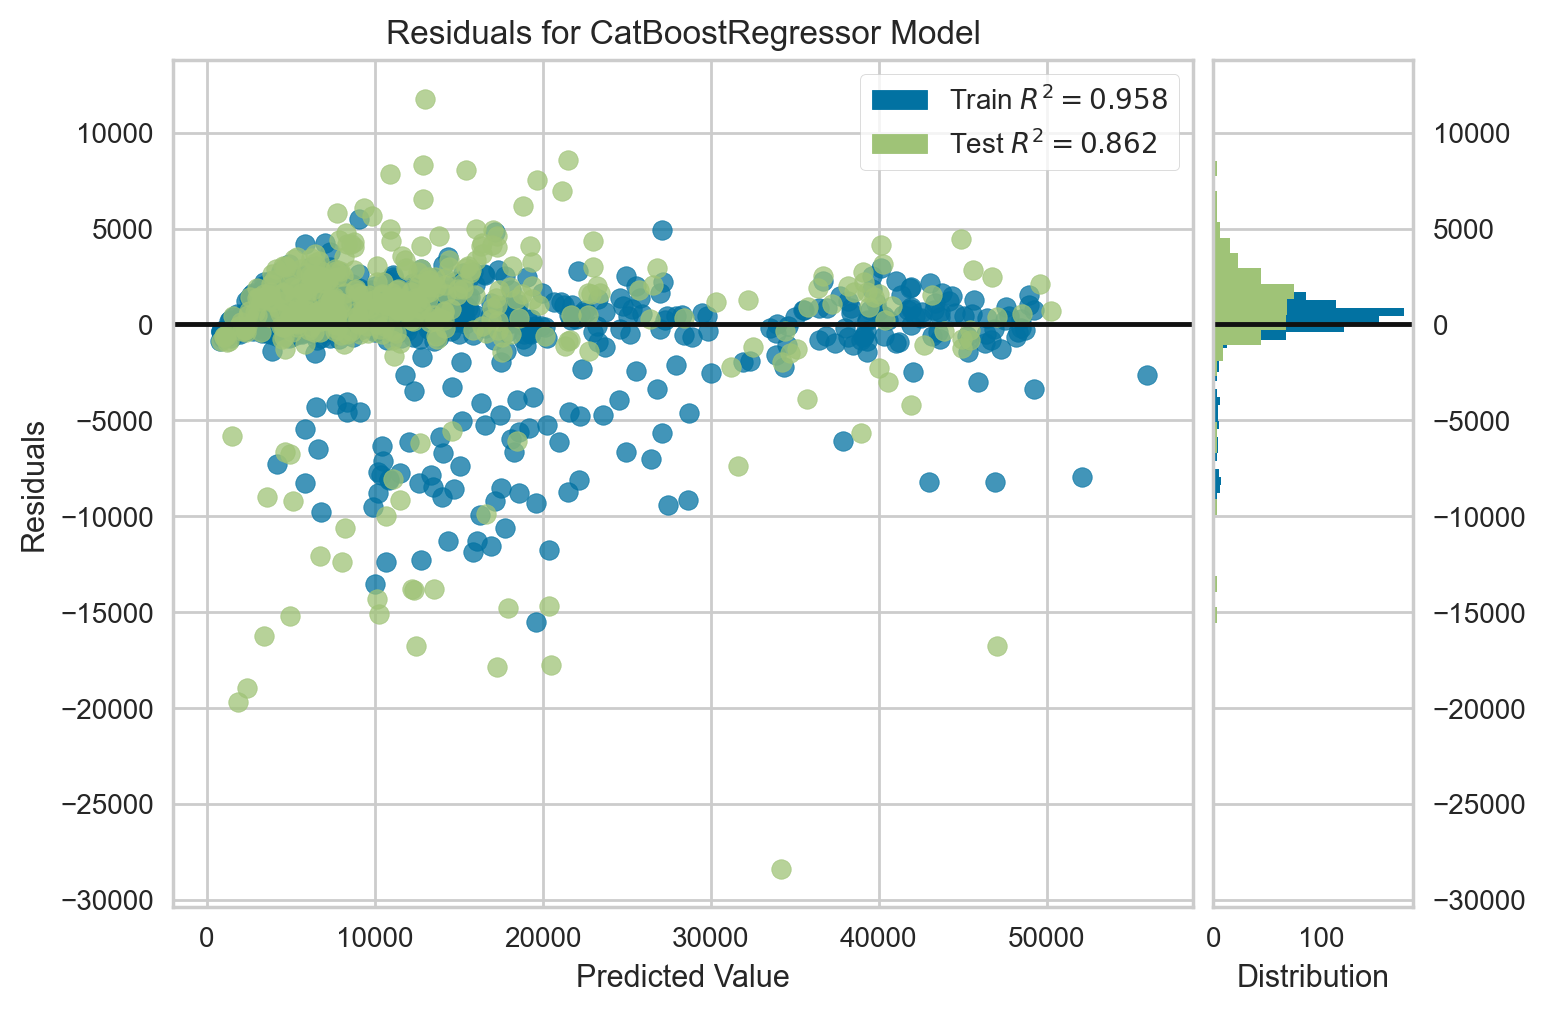

In [43]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)



In [44]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

In [45]:
# help(plot_model)

In [46]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3090.7426,27877897.1696,5279.9524,0.6470,0.6213,0.4468
3,3247.8918,26531240.5577,5150.8485,0.7785,0.7497,0.5276
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2930.1800,21751409.5632,4663.8406,0.8601,0.4058,0.2873
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


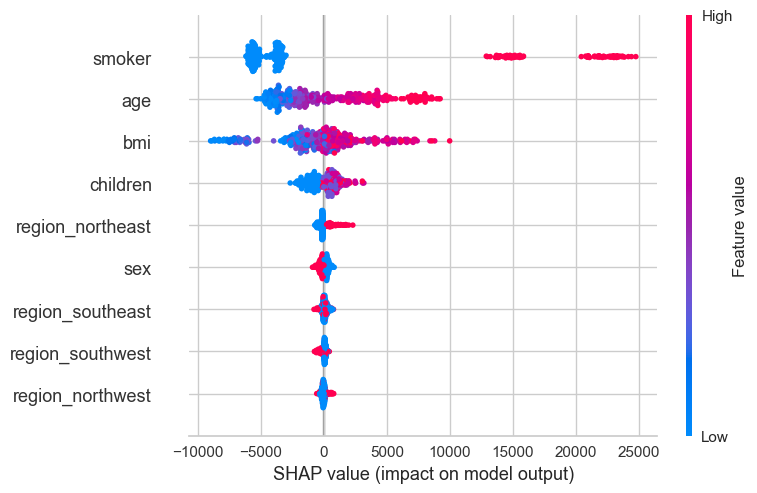

In [47]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [48]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [49]:
# help(interpret_model)

In [50]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4303.5559,3.838806e+07,6176.5920,0.7306,0.5949,0.4433
1,Lasso Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4303.7697,3.838680e+07,6176.4824,0.7306,0.5952,0.4434
2,Ridge Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4317.6984,3.839644e+07,6177.2329,0.7306,0.5891,0.4459
3,Elastic Net,"(TransformerWrapper(include=['age', 'bmi', 'ch...",7372.5238,9.045078e+07,9468.3193,0.3792,0.7342,0.9184
4,Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4303.5559,3.838806e+07,6176.5920,0.7306,0.5949,0.4433
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4303.7694,3.838682e+07,6176.4846,0.7306,0.5952,0.4434
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['age', 'bmi', 'ch...",9089.9268,1.334394e+08,11488.4238,0.0884,0.8790,1.1514
7,Bayesian Ridge,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4311.2349,3.839195e+07,6176.8896,0.7306,0.5910,0.4447
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4537.0122,6.734631e+07,8142.7826,0.5422,0.5276,0.3207


In [51]:
# help(get_leaderboard)

In [52]:
# find best model based on CV metrics
automl()

DecisionTreeRegressor(max_depth=4, random_state=123)

In [54]:
# create gradio app
create_app(best)



* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
